# README

## Overview
This Jupyter Notebook performs a comparative analysis of baseline QSAR (Quantitative Structure-Activity Relationship) models and a final GAT (Graph Attention Network) model for both classification and regression tasks. The notebook includes data loading, metric extraction, and visualization of results using bar charts and radar plots.

## Features
1. **Baseline QSAR Classification Analysis**:
    - Loads classification performance metrics from a CSV file.
    - Automatically selects the best baseline model based on accuracy.
    - Extracts key metrics (accuracy, precision, recall, F1-score) for comparison.

2. **Final GAT Classification Analysis**:
    - Loads final GAT classification metrics from a CSV file.
    - Extracts key metrics for comparison with the baseline QSAR model.

3. **Baseline QSAR Regression Analysis**:
    - Loads regression performance metrics from a CSV file.
    - Automatically selects the best baseline model based on R² score.
    - Extracts key metrics (R², MSE) for comparison.

4. **Final GAT Regression Analysis**:
    - Loads final GAT regression metrics from a CSV file.
    - Extracts key metrics for comparison with the baseline QSAR model.

5. **Visualization**:
    - Generates side-by-side bar charts and radar plots for classification and regression metrics.
    - Saves the plots as image files for further use.

## Dependencies
- Python 3.x
- Libraries:
  - `pandas`: For data manipulation and analysis.
  - `numpy`: For numerical operations.
  - `matplotlib`: For creating visualizations.

## How to Use
1. Ensure the required CSV files are available at the specified paths:
    - Classification: `../6_baseline_comparison/QSAR_classification_performance_summary.csv`
    - Final GAT Classification: `../5_model_training/GAT_results/classification_10fold/final_metrics.csv`
    - Regression: `../6_baseline_comparison/QSAR_regression_performance_summary.csv`
    - Final GAT Regression: `../5_model_training/GAT_results/regression_10fold/final_metrics.csv`

2. Adjust the file paths and parameters (e.g., `kfold`, `model`) as needed.

3. Run the notebook cells sequentially to:
    - Load and process the data.
    - Compare baseline QSAR and final GAT models.
    - Visualize the results.

4. The generated plots will be saved as PNG files in the current working directory.

## Outputs
- **Bar Charts**:
  - `bar_chart_GAT_vs_QSARcomparison.png`: Classification metrics comparison.
  - `bar_chart_GAT_vs_QSAR_regression_comparison.png`: Regression metrics comparison.

- **Radar Plots**:
  - `radar_plot_GAT_vs_QSARcomparison.png`: Classification metrics comparison.
  - `radar_plot_GAT_vs_QSAR_regression_comparison.png`: Regression metrics comparison.

## Notes
- Ensure the CSV files contain the required columns and data format as expected by the notebook.
- Modify the visualization parameters (e.g., figure size, labels) as needed for customization.

<a id="step9"></a>
## Baseline QSAR Comparison
- Load `classification_performance_summary.csv`.  
- Auto-select best baseline by accuracy and print its `model_type` and `input_type`.  
- Compare baseline vs. final GAT on all metrics.  
- **Visualizations updated:** side-by-side **bar chart** plus **radar plot**.


Baseline QSAR → model: 'SVM', feature selection: 'genetic_algorithm', accuracy: 0.828
Final GAT → accuracy: 0.736, precision: 0.730, recall: 0.736, f1_score: 0.731, auc_roc: 0.826


,Baseline QSAR,Final GAT
accuracy,0.828,0.736
precision,0.828,0.730
recall,0.828,0.736
f1_score,0.828,0.731


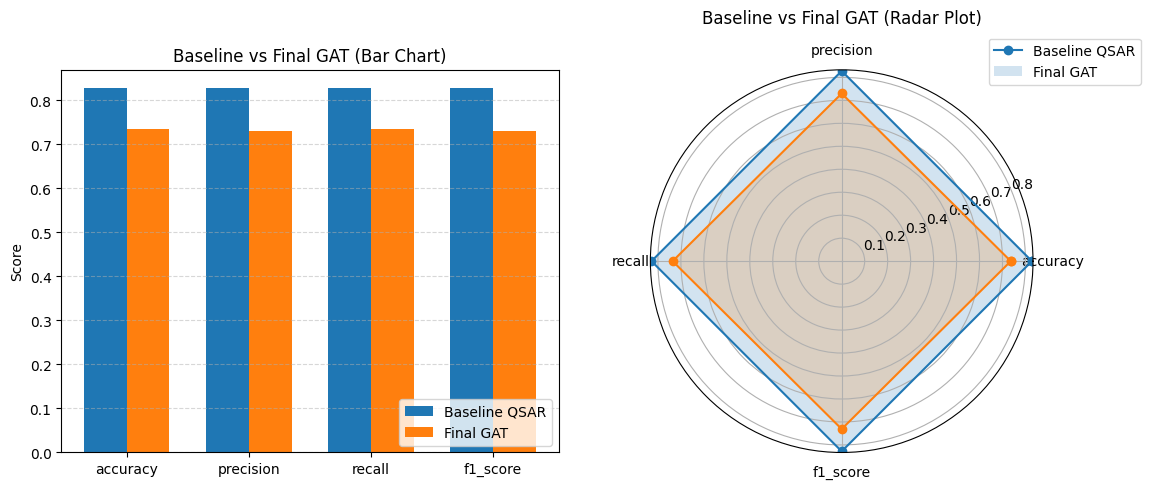

In [4]:
# %%
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load baseline summary CSV
baseline_csv = "../6_baseline_comparison/QSAR_classification_performance_summary.csv"
baseline_df  = pd.read_csv(baseline_csv)

# Pick the row with the highest accuracy
best_baseline_idx = baseline_df["accuracy"].idxmax()
best_baseline     = baseline_df.loc[best_baseline_idx]

# Print which baseline you’re using
model_type = best_baseline["model_type"]
input_type = best_baseline["input_type"]
print(
    f"Baseline QSAR → model: '{model_type}', "
    f"feature selection: '{input_type}', "
    f"accuracy: {best_baseline['accuracy']:.3f}"
)

# Extract baseline metrics
baseline_metrics = {
    "accuracy":  best_baseline["accuracy"],
    "precision": best_baseline["precision"],
    "recall":    best_baseline["recall"],
    "f1_score":  best_baseline["f1_score"],
}

#Load final GAT metrics from CSV
kfold =10  # ← adjust this value based on your k-fold cross-validation
model = "GAT"  # ← adjust this value based on your model
final_csv = f"../5_model_training/GAT_results/classification_{kfold}fold/final_metrics.csv"  # ← adjust this path
final_df  = pd.read_csv(final_csv)
final_row = final_df.iloc[0]

print(
    f"Final GAT → accuracy: {final_row['accuracy']:.3f}, "
    f"precision: {final_row['precision']:.3f}, "
    f"recall: {final_row['recall']:.3f}, "
    f"f1_score: {final_row['f1_score']:.3f}, "
    f"auc_roc: {final_row.get('auc_roc', np.nan):.3f}"
)

final_metrics = {
    "accuracy":  final_row["accuracy"],
    "precision": final_row["precision"],
    "recall":    final_row["recall"],
    "f1_score":  final_row["f1_score"],
}

#Build comparison DataFrame
metrics = list(baseline_metrics.keys())
comp_df = pd.DataFrame({
    "Baseline QSAR": [baseline_metrics[m] for m in metrics],
    "Final GAT":    [final_metrics[m]    for m in metrics]
}, index=metrics).round(3)

display(comp_df)

#Plot bar chart and radar plot side-by-side
labels        = metrics
baseline_vals = comp_df['Baseline QSAR'].tolist()
final_vals    = comp_df['Final GAT'].tolist()

fig = plt.figure(figsize=(12, 5))

# Bar chart
ax_bar = fig.add_subplot(1, 2, 1)
x = np.arange(len(labels))
width = 0.35
ax_bar.bar(x - width/2, baseline_vals, width, label='Baseline QSAR')
ax_bar.bar(x + width/2, final_vals,    width, label='Final GAT')
ax_bar.set_xticks(x)
ax_bar.set_xticklabels(labels, rotation=0)
ax_bar.set_ylabel('Score')
ax_bar.set_title('Baseline vs Final GAT (Bar Chart)')
ax_bar.legend(loc='lower right')
ax_bar.grid(axis='y', linestyle='--', alpha=0.5)

# Save the bar chart as an image
plt.savefig(f"bar_chart_{model}_vs_QSARcomparison.png")

# Radar plot
ax_rad = fig.add_subplot(1, 2, 2, polar=True)
baseline_loop = baseline_vals + baseline_vals[:1]
final_loop    = final_vals    + final_vals[:1]
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]
ax_rad.plot(angles, baseline_loop, marker='o')
ax_rad.fill(angles, baseline_loop, alpha=0.2)
ax_rad.plot(angles, final_loop, marker='o')
ax_rad.fill(angles, final_loop, alpha=0.2)
ax_rad.set_thetagrids(np.degrees(angles[:-1]), labels)
ax_rad.set_title('Baseline vs Final GAT (Radar Plot)', y=1.1)
ax_rad.legend(['Baseline QSAR', 'Final GAT'], loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Save the radar plot as an image
plt.savefig(f"radar_plot_{model}_vs_QSARcomparison.png")

plt.tight_layout()
plt.show()


<a id="step9"></a>
## Baseline QSAR Comparison
- Load `regression_performance_summary.csv`.  
- Auto-select best baseline by accuracy and print its `model_type` and `input_type`.  
- Compare baseline vs. final GAT on all metrics.  
- **Visualizations updated:** side-by-side **bar chart** 

Baseline QSAR Regression → model: 'random_forest', feature selection: 'PCA', R²: 0.655, MSE: 3.150
Final GAT Regression → R²: 0.335, MSE: 0.884


,Baseline QSAR,Final GAT
R²,0.655,0.335
MSE,3.150,0.884


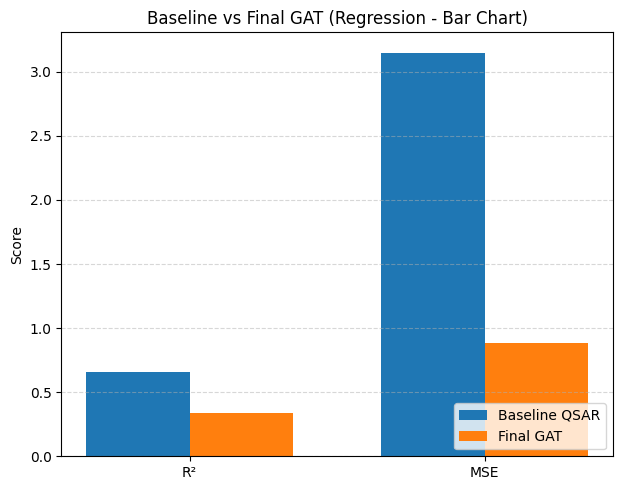

In [6]:
# Load QSAR regression performance summary CSV
regression_csv = "../6_baseline_comparison/QSAR_regression_performance_summary.csv"
regression_df = pd.read_csv(regression_csv)

# Auto-select the best baseline by R² score
best_regression_idx = regression_df["r2_score"].idxmax()
best_regression = regression_df.loc[best_regression_idx]

# Print the best baseline details
reg_model_type = best_regression["model_type"]
reg_input_type = best_regression["input_type"]
print(
    f"Baseline QSAR Regression → model: '{reg_model_type}', "
    f"feature selection: '{reg_input_type}', "
    f"R²: {best_regression['r2_score']:.3f}, "
    f"MSE: {best_regression['mse']:.3f}"
)

# Extract baseline regression metrics
baseline_regression_metrics = {
    "R²": best_regression["r2_score"],
    "MSE": best_regression["mse"],
}

# Load final GAT regression metrics from CSV
final_regression_csv = f"../5_model_training/GAT_results/regression_{kfold}fold/final_metrics.csv"  # Adjust path as needed
final_regression_df = pd.read_csv(final_regression_csv)
final_regression_row = final_regression_df.iloc[0]

print(
    f"Final GAT Regression → R²: {final_regression_row['r2']:.3f}, "
    f"MSE: {final_regression_row['mse']:.3f}"
)

final_regression_metrics = {
    "R²": final_regression_row["r2"],
    "MSE": final_regression_row["mse"],
}

# Build comparison DataFrame
regression_metrics = list(baseline_regression_metrics.keys())
regression_comp_df = pd.DataFrame({
    "Baseline QSAR": [baseline_regression_metrics[m] for m in regression_metrics],
    "Final GAT": [final_regression_metrics[m] for m in regression_metrics]
}, index=regression_metrics).round(3)

display(regression_comp_df)

# Plot bar chart and radar plot side-by-side for regression metrics
regression_labels = regression_metrics
baseline_regression_vals = regression_comp_df['Baseline QSAR'].tolist()
final_regression_vals = regression_comp_df['Final GAT'].tolist()

fig_regression = plt.figure(figsize=(12, 5))

# Bar chart
ax_bar_regression = fig_regression.add_subplot(1, 2, 1)
x_regression = np.arange(len(regression_labels))
ax_bar_regression.bar(x_regression - width/2, baseline_regression_vals, width, label='Baseline QSAR')
ax_bar_regression.bar(x_regression + width/2, final_regression_vals, width, label='Final GAT')
ax_bar_regression.set_xticks(x_regression)
ax_bar_regression.set_xticklabels(regression_labels, rotation=0)
ax_bar_regression.set_ylabel('Score')
ax_bar_regression.set_title('Baseline vs Final GAT (Regression - Bar Chart)')
ax_bar_regression.legend(loc='lower right')
ax_bar_regression.grid(axis='y', linestyle='--', alpha=0.5)

# Save the bar chart as an image
plt.savefig(f"bar_chart_{model}_vs_QSAR_regression_comparison.png")


plt.tight_layout()
plt.show()